# Load the data

In [92]:
import numpy as np
import pandas as pd

In [93]:
# Get The data
raw_data = pd.read_csv(('weatherAUS.csv'))
raw_data.info()
raw_data.shape


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

(145460, 23)

***Cleaning the data***

In [94]:
# Checking all the null vals
raw_data.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [95]:
# filling all the null values from the numerical data with their respective mean value
# This method is taken from a kaggle code, but we have some different names, but 
# I think i'ts okey to use the same method.

raw_data['MinTemp']=raw_data['MinTemp'].fillna(raw_data['MinTemp'].mean())
raw_data['MaxTemp']=raw_data['MaxTemp'].fillna(raw_data['MaxTemp'].mean())
raw_data['Rainfall']=raw_data['Rainfall'].fillna(raw_data['Rainfall'].mean())
raw_data['Evaporation']=raw_data['Evaporation'].fillna(raw_data['Evaporation'].mean())
raw_data['Sunshine']=raw_data['Sunshine'].fillna(raw_data['Sunshine'].mean())
raw_data['WindGustSpeed']=raw_data['WindGustSpeed'].fillna(raw_data['WindGustSpeed'].mean())
raw_data['WindSpeed9am']=raw_data['WindSpeed9am'].fillna(raw_data['WindSpeed9am'].mean())
raw_data['WindSpeed3pm']=raw_data['WindSpeed3pm'].fillna(raw_data['WindSpeed3pm'].mean())
raw_data['Humidity9am']=raw_data['Humidity9am'].fillna(raw_data['Humidity9am'].mean())
raw_data['Humidity3pm']=raw_data['Humidity3pm'].fillna(raw_data['Humidity3pm'].mean())
raw_data['Pressure9am']=raw_data['Pressure9am'].fillna(raw_data['Pressure9am'].mean())
raw_data['Pressure3pm']=raw_data['Pressure3pm'].fillna(raw_data['Pressure3pm'].mean())
raw_data['Cloud9am']=raw_data['Cloud9am'].fillna(raw_data['Cloud9am'].mean())
raw_data['Cloud3pm']=raw_data['Cloud3pm'].fillna(raw_data['Cloud3pm'].mean())
raw_data['Temp9am']=raw_data['Temp9am'].fillna(raw_data['Temp9am'].mean())
raw_data['Temp3pm']=raw_data['Temp3pm'].fillna(raw_data['Temp3pm'].mean())    

In [96]:
# Filling all the null values from the categorical data with their most frequently occurring value
raw_data['WindGustDir']=raw_data['WindGustDir'].fillna(raw_data['WindGustDir'].mode()[0])
raw_data['WindDir9am']=raw_data['WindDir9am'].fillna(raw_data['WindDir9am'].mode()[0])
raw_data['WindDir3pm']=raw_data['WindDir3pm'].fillna(raw_data['WindDir3pm'].mode()[0])
raw_data['RainToday']=raw_data['RainToday'].fillna(raw_data['RainToday'].mode()[0])
raw_data['RainTomorrow']=raw_data['RainTomorrow'].fillna(raw_data['RainTomorrow'].mode()[0])

In [97]:
raw_data.head(5)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,5.468232,7.611178,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.000000,4.50993,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,5.468232,7.611178,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,4.447461,4.50993,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,5.468232,7.611178,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,4.447461,2.00000,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,5.468232,7.611178,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,4.447461,4.50993,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,5.468232,7.611178,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.000000,8.00000,17.8,29.7,No,No


In [98]:
# making categorical yes and no to 1 and 0 respectivevly
raw_data['RainTomorrow']=raw_data['RainTomorrow'].map({'Yes':1,'No':0})
raw_data['RainToday']=raw_data['RainToday'].map({'Yes':1,'No':0})

In [99]:
# from date convert to day, month
raw_data['Date']=pd.to_datetime(raw_data['Date'])
raw_data['day']=raw_data['Date'].dt.day
raw_data['month']=raw_data['Date'].dt.month
#drop date
raw_data.drop('Date',axis=1,inplace=True)

In [100]:
raw_data.head(5)

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,day,month
0,Albury,13.4,22.9,0.6,5.468232,7.611178,W,44.0,W,WNW,...,1007.7,1007.1,8.000000,4.50993,16.9,21.8,0,0,1,12
1,Albury,7.4,25.1,0.0,5.468232,7.611178,WNW,44.0,NNW,WSW,...,1010.6,1007.8,4.447461,4.50993,17.2,24.3,0,0,2,12
2,Albury,12.9,25.7,0.0,5.468232,7.611178,WSW,46.0,W,WSW,...,1007.6,1008.7,4.447461,2.00000,21.0,23.2,0,0,3,12
3,Albury,9.2,28.0,0.0,5.468232,7.611178,NE,24.0,SE,E,...,1017.6,1012.8,4.447461,4.50993,18.1,26.5,0,0,4,12
4,Albury,17.5,32.3,1.0,5.468232,7.611178,W,41.0,ENE,NW,...,1010.8,1006.0,7.000000,8.00000,17.8,29.7,0,0,5,12


In [101]:
raw_data=pd.get_dummies(raw_data)
index = raw_data.columns.get_loc('RainTomorrow')
print(index)

17


In [102]:
raw_data.head(5)

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
0,13.4,22.9,0.6,5.468232,7.611178,44.0,20.0,24.0,71.0,22.0,...,False,False,False,False,False,False,False,False,True,False
1,7.4,25.1,0.0,5.468232,7.611178,44.0,4.0,22.0,44.0,25.0,...,False,False,False,False,False,False,False,False,False,True
2,12.9,25.7,0.0,5.468232,7.611178,46.0,19.0,26.0,38.0,30.0,...,False,False,False,False,False,False,False,False,False,True
3,9.2,28.0,0.0,5.468232,7.611178,24.0,11.0,9.0,45.0,16.0,...,False,False,False,False,False,False,False,False,False,False
4,17.5,32.3,1.0,5.468232,7.611178,41.0,7.0,20.0,82.0,33.0,...,False,True,False,False,False,False,False,False,False,False


### Mislabel the dataset

In [103]:
import pandas as pd
import numpy as np

# Get three copies of the original data set to mislabel in three different levels
mislabel_data1 = raw_data.copy()
mislabel_data2 = raw_data.copy()
mislabel_data3 = raw_data.copy()

# Define the percentage of labels to be swapped
mislabeling_level1 = 10
mislabeling_level2 = 20
mislabeling_level3 = 30

# Convert the labels to a numpy array for easier manipulation
misclass_labels = np.array(raw_data['RainTomorrow'])

# Calculate the number of labels to swap based on the percentage
n_swap1 = int(len(misclass_labels) * mislabeling_level1 / 100)
n_swap2 = int(len(misclass_labels) * mislabeling_level2 / 100)
n_swap3 = int(len(misclass_labels) * mislabeling_level3 / 100)

# Randomly select the indices of the labels to be swapped
swap_indices1 = np.random.choice(len(misclass_labels), n_swap1, replace=False)
swap_indices2 = np.random.choice(len(misclass_labels), n_swap2, replace=False)
swap_indices3 = np.random.choice(len(misclass_labels), n_swap3, replace=False)

# Swap the labels at the selected indices to their opposite values
misclass_labels1 = misclass_labels.copy()
misclass_labels1[swap_indices1] = 1 - misclass_labels1[swap_indices1]

misclass_labels2 = misclass_labels.copy()
misclass_labels2[swap_indices2] = 1 - misclass_labels2[swap_indices2]

misclass_labels3 = misclass_labels.copy()
misclass_labels3[swap_indices3] = 1 - misclass_labels3[swap_indices3]

# Create new data frames from the modified label arrays
mislabel_data1['RainTomorrow'] = pd.DataFrame(misclass_labels1, columns=['RainTomorrow'])
mislabel_data2['RainTomorrow'] = pd.DataFrame(misclass_labels2, columns=['RainTomorrow'])
mislabel_data3['RainTomorrow'] = pd.DataFrame(misclass_labels3, columns=['RainTomorrow'])

In [104]:
#label are the value we want to predict
labels=raw_data['RainTomorrow']

#remove the label from the features
raw_data=raw_data.drop('RainTomorrow',axis=1)
mislabel_data1 = mislabel_data1.drop('RainTomorrow',axis=1)
mislabel_data2 = mislabel_data2.drop('RainTomorrow',axis=1)
mislabel_data3 = mislabel_data3.drop('RainTomorrow',axis=1)


#saving feature name 
feature_list=list(raw_data.columns)

### Splitting the data into training and test split

In [86]:
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
# Split to get unaltered test set
_, test_features, _, test_labels = train_test_split(raw_data, labels, test_size=0.20, random_state=42)

# Split to get 3 training sets with mislabeled data
train_features1, _, train_labels1, _ = train_test_split(mislabel_data1, misclass_labels1, test_size=0.20, random_state=42)
train_features2, _, train_labels2, _ = train_test_split(mislabel_data2, misclass_labels2, test_size=0.20, random_state=42)
train_features3, _, train_labels3, _ = train_test_split(mislabel_data3, misclass_labels3, test_size=0.20, random_state=42)

## KNN

In [87]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import neighbors
model = neighbors.KNeighborsClassifier(20, weights='uniform')
model.fit(train_features3, train_labels3)

KNeighborsClassifier(n_neighbors=20)

In [88]:
#calculate accuracy
accuracy=model.score(test_features, test_labels)
print('Accuracy: ',round(accuracy,2)*100,'%')

Accuracy:  55.00000000000001 %


### Cross validation
Performing cross validation to find a suitable k based on a good trade-off between overfitting and generalization.

In [ ]:
from sklearn.model_selection import cross_validate
k_s = np.linspace(1, 25, num=25, dtype=int)
best_k = 0
best_score = 0
iteration = 0
scoring = ['f1_macro', 'accuracy', 'roc_auc']

for k in k_s:
    iteration += 1
    print(f'Iteration {iteration}')
    
    model = neighbors.KNeighborsClassifier(k, weights='uniform')
    model.fit(train_features, train_labels)
    cv_scores = cross_validate(model, train_features, train_labels, cv=10, scoring=scoring)
    meaned_score = np.mean(cv_scores['test_f1_macro']+cv_scores['test_accuracy']+cv_scores['test_roc_auc'])
    
    if meaned_score > best_score:
        best_score = np.mean(cv_scores['test_f1_macro']+cv_scores['test_accuracy']+cv_scores['test_roc_auc'])
        best_k = k
        print(f"Current best k = {best_k}, F1 Macro: {np.mean(cv_scores['test_f1_macro'])}, Accuracy: {np.mean(cv_scores['test_accuracy'])}, ROC AUC: {np.mean(cv_scores['test_roc_auc'])}")

        
    
    

Iteration 1
Current best k = 1, F1 Macro: 0.6986402579082683, Accuracy: 0.7966021885598422, ROC AUC: 0.6961565039142139
Iteration 2
Current best k = 2, F1 Macro: 0.6770651583798853, Accuracy: 0.8245222081639824, ROC AUC: 0.7528210005845626
Iteration 3
Current best k = 3, F1 Macro: 0.7252597810360096, Accuracy: 0.8262495519840714, ROC AUC: 0.7803839662280774
Iteration 4
Current best k = 4, F1 Macro: 0.7051608717625587, Accuracy: 0.8343960848673401, ROC AUC: 0.7983884233259883
Iteration 5
Current best k = 5, F1 Macro: 0.7317383389680343, Accuracy: 0.8351952665590276, ROC AUC: 0.8102610071915912
Iteration 6
Iteration 7
Current best k = 7, F1 Macro: 0.736468422914297, Accuracy: 0.8405747492329338, ROC AUC: 0.8251816533644076
Iteration 8


In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
# Uncomment of not performed the cross validation
best_k = 41 #Best found k found to be 31/41

pca = PCA(n_components=2)
train_features_pca = pca.fit_transform(train_features)

# Train a K-nearest neighbor classifier on the projected data
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(train_features_pca, train_labels)

# Create a meshgrid of points to represent the entire feature space
x_min, x_max = train_features_pca[:, 0].min() - 1, train_features_pca[:, 0].max() + 1
y_min, y_max = train_features_pca[:, 1].min() - 1, train_features_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

# Classify each point in the meshgrid using the trained KNeighborsClassifier model
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

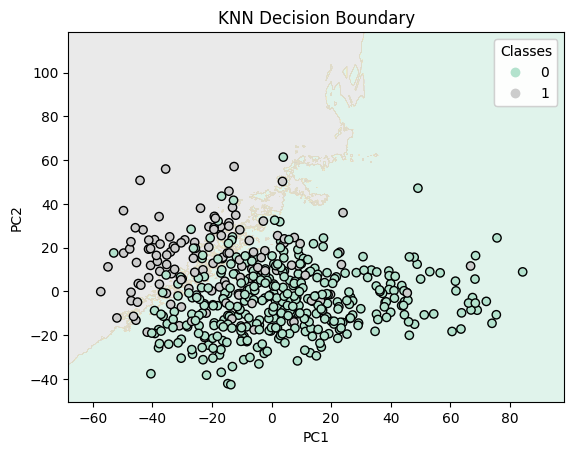

In [19]:
# Plot the data points, colored by their true labels, and the decision boundary
fig, ax = plt.subplots()
ax.contourf(xx, yy, Z, alpha=0.4, cmap=plt.get_cmap('Pastel2'))
ploten = ax.scatter(train_features_pca[1:500, 0], train_features_pca[1:500, 1], c=train_labels[1:500], cmap=plt.get_cmap('Pastel2'), edgecolor='k')
legend1 = ax.legend(*ploten.legend_elements(),
                    loc="upper right", title="Classes")
ax.add_artist(legend1)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_title('KNN Decision Boundary')
plt.show()

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets
from sklearn.inspection import DecisionBoundaryDisplay

In [21]:
# convert from pandas to numpy
raw_data_np = raw_data.to_numpy()

In [22]:
n_neighbors = 15

# Copying the data to be able to delete target from training
raw_data_copy = np.copy(raw_data_np)


# we only take the first two features. We could avoid this ugly
# slicing by using a two-dim dataset
y = raw_data_copy[:, 17:18]
y = np.ravel(y)
X = np.delete(raw_data_copy, 17, 1)

# Logistic Regression

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

LogReg = make_pipeline(StandardScaler(), LogisticRegression(random_state=0))
LogReg.fit(train_features, train_labels)
print(LogReg.score(test_features, test_labels))

0.8477932077547092


In [25]:
# Train a Logistic regression classifier on the projected data
LogReg = make_pipeline(StandardScaler(), LogisticRegression(random_state=0))
LogReg.fit(train_features_pca, train_labels)

# Create a meshgrid of points to represent the entire feature space
x_min, x_max = train_features_pca[:, 0].min() - 1, train_features_pca[:, 0].max() + 1
y_min, y_max = train_features_pca[:, 1].min() - 1, train_features_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

# Classify each point in the meshgrid using the trained KNeighborsClassifier model
Z = LogReg.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

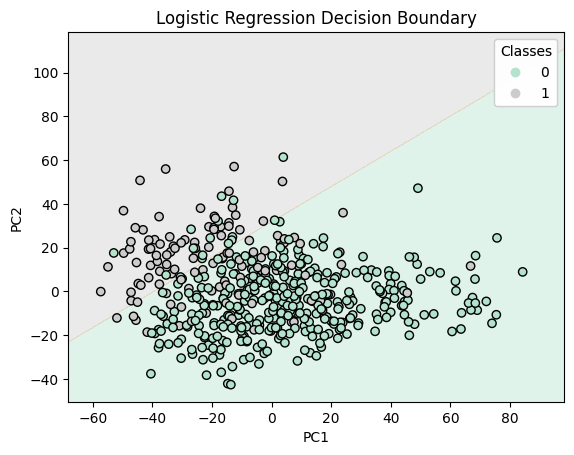

In [26]:
# Plot the data points, colored by their true labels, and the decision boundary
fig, ax = plt.subplots()
ax.contourf(xx, yy, Z, alpha=0.4, cmap=plt.get_cmap('Pastel2'))
ploten = ax.scatter(train_features_pca[1:500, 0], train_features_pca[1:500, 1], c=train_labels[1:500], cmap=plt.get_cmap('Pastel2'), edgecolor='k')
legend1 = ax.legend(*ploten.legend_elements(),
                    loc="upper right", title="Classes")
ax.add_artist(legend1)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_title('Logistic Regression Decision Boundary')
plt.show()

# LDA

In [27]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
LDA = LinearDiscriminantAnalysis(solver='lsqr', shrinkage='auto')
LDA.fit(train_features, train_labels)
print(LDA.score(test_features, test_labels))

0.8458682799395023


In [28]:
# Train a LDA classifier on the projected data
LDA = make_pipeline(StandardScaler(), LinearDiscriminantAnalysis(solver='lsqr', shrinkage='auto'))
LDA.fit(train_features_pca, train_labels)

# Create a meshgrid of points to represent the entire feature space
x_min, x_max = train_features_pca[:, 0].min() - 1, train_features_pca[:, 0].max() + 1
y_min, y_max = train_features_pca[:, 1].min() - 1, train_features_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

# Classify each point in the meshgrid using the trained KNeighborsClassifier model
Z = LDA.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

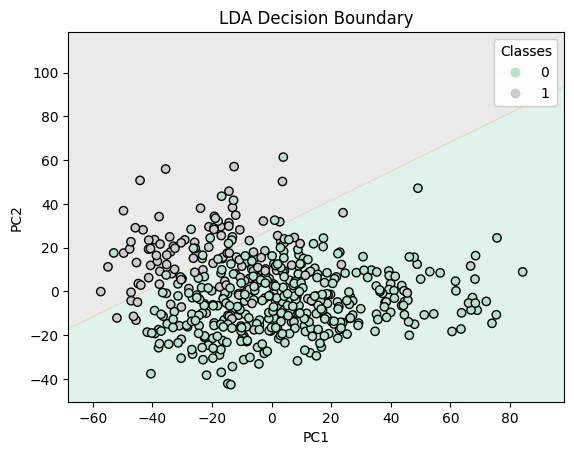

In [29]:
# Plot the data points, colored by their true labels, and the decision boundary
fig, ax = plt.subplots()
ax.contourf(xx, yy, Z, alpha=0.4, cmap=plt.get_cmap('Pastel2'))
ploten = ax.scatter(train_features_pca[1:500, 0], train_features_pca[1:500, 1], c=train_labels[1:500], cmap=plt.get_cmap('Pastel2'), edgecolor='k')
legend1 = ax.legend(*ploten.legend_elements(),
                    loc="upper right", title="Classes")
ax.add_artist(legend1)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_title('LDA Decision Boundary')
plt.show()

### Cross-validation comparison between the different classifier methods

In [30]:
from sklearn.model_selection import cross_validate
scoring = ['f1_macro', 'accuracy', 'roc_auc']

cv_knn = cross_validate(knn, train_features_pca, train_labels, cv=10, scoring=scoring)
cv_LogReg = cross_validate(LogReg, train_features_pca, train_labels, cv=10, scoring=scoring)
cv_LDA = cross_validate(LDA, train_features_pca, train_labels, cv=10, scoring=scoring)

print(f"KNN F1 Macro: {np.mean(cv_knn['test_f1_macro'])}, Accuracy: {np.mean(cv_knn['test_accuracy'])}, ROC AUC: {np.mean(cv_knn['test_roc_auc'])}")
print(f"Logistic Regression: F1 Macro: {np.mean(cv_LogReg['test_f1_macro'])}, Accuracy: {np.mean(cv_LogReg['test_accuracy'])}, ROC AUC: {np.mean(cv_LogReg['test_roc_auc'])}")
print(f"LDA: F1 Macro: {np.mean(cv_LDA['test_f1_macro'])}, Accuracy: {np.mean(cv_LDA['test_accuracy'])}, ROC AUC: {np.mean(cv_LDA['test_roc_auc'])}")

KNN F1 Macro: 0.706650068145058, Accuracy: 0.8299790443900372, ROC AUC: 0.8178653496078633
Logistic Regression: F1 Macro: 0.7017863451893104, Accuracy: 0.8301251264584316, ROC AUC: 0.8255112652287451
LDA: F1 Macro: 0.6989237133460992, Accuracy: 0.8275385011588521, ROC AUC: 0.8253205403161429
